In [9]:
print(tweets_df[['text', 'cleaned_text']].head())

                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                        cleaned_text  
0                                        What  said.  
1  plus you've added commercials to the experienc...  
2  I didn't today... Must mean I need to take ano...  
3  it's really aggressive to blast obnoxious "ent...  
4           and it's a really big bad thing about it  


In [10]:
print(tweets_df[['cleaned_text', 'tokenized_text']].head())

                                        cleaned_text  \
0                                        What  said.   
1  plus you've added commercials to the experienc...   
2  I didn't today... Must mean I need to take ano...   
3  it's really aggressive to blast obnoxious "ent...   
4           and it's a really big bad thing about it   

                                      tokenized_text  
0                                             [said]  
1      [plus, added, commercials, experience, tacky]  
2     [today, must, mean, need, take, another, trip]  
3  [really, aggressive, blast, obnoxious, enterta...  
4                          [really, big, bad, thing]  


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join the tokenized words back into a single string for TF-IDF vectorization
tweets_df['processed_text'] = tweets_df['tokenized_text'].apply(lambda x: ' '.join(x))

# Initialize TF-IDF Vectorizer
# You can customize parameters like max_features, ngram_range, min_df, max_df if needed.
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limiting to 5000 features for demonstration

# Fit and transform the processed text to create the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(tweets_df['processed_text'])

print("Shape of the TF-IDF matrix:", tfidf_matrix.shape)
print("First 5 feature names (vocabulary):")
print(tfidf_vectorizer.get_feature_names_out()[:5])

# You can also store the TF-IDF matrix or convert it to a DataFrame if needed
# For example, to get a dense array and convert to DataFrame:
# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

Shape of the TF-IDF matrix: (14640, 5000)
First 5 feature names (vocabulary):
['aa' 'aadvantage' 'abandoned' 'abc' 'ability']


In [12]:
negative_tweets_df = tweets_df[tweets_df['airline_sentiment'] == 'negative']

print("Shape of the negative_tweets_df:", negative_tweets_df.shape)
print("\nFirst 5 rows of negative_tweets_df:")
print(negative_tweets_df.head())

Shape of the negative_tweets_df: (9178, 18)

First 5 rows of negative_tweets_df:
              tweet_id airline_sentiment  airline_sentiment_confidence  \
3   570301031407624196          negative                        1.0000   
4   570300817074462722          negative                        1.0000   
5   570300767074181121          negative                        1.0000   
15  570282469121007616          negative                        0.6842   
17  570276917301137409          negative                        1.0000   

   negativereason  negativereason_confidence         airline  \
3      Bad Flight                     0.7033  Virgin America   
4      Can't Tell                     1.0000  Virgin America   
5      Can't Tell                     0.6842  Virgin America   
15    Late Flight                     0.3684  Virgin America   
17     Bad Flight                     1.0000  Virgin America   

   airline_sentiment_gold             name negativereason_gold  retweet_count  \
3       

In [13]:
negative_tweet_indices = negative_tweets_df.index
negative_tfidf_matrix = tfidf_matrix[negative_tweet_indices]

print("Shape of TF-IDF matrix for negative tweets:", negative_tfidf_matrix.shape)

Shape of TF-IDF matrix for negative tweets: (9178, 5000)


In [14]:
negative_tfidf_sums = negative_tfidf_matrix.sum(axis=0).A.flatten()

print("Shape of negative_tfidf_sums:", negative_tfidf_sums.shape)
print("First 10 summed TF-IDF scores for negative terms:", negative_tfidf_sums[:10])

Shape of negative_tfidf_sums: (5000,)
First 10 summed TF-IDF scores for negative terms: [35.10226018  1.52820214  0.79977259  2.25635095  1.92029453 22.60694134
  0.73997325  0.83281602  7.07421511  7.58572603]


In [15]:
import pandas as pd

# Retrieve feature names (terms) from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a pandas Series with feature names as index and summed TF-IDF scores as values
negative_terms_tfidf_scores = pd.Series(negative_tfidf_sums, index=feature_names)

# Sort the Series in descending order to find the top terms
top_negative_terms = negative_terms_tfidf_scores.sort_values(ascending=False)

print("Top 10 terms in negative tweets by summed TF-IDF score:")
print(top_negative_terms.head(10))

Top 10 terms in negative tweets by summed TF-IDF score:
flight       409.940860
get          192.412607
cancelled    189.311350
service      160.049923
hold         159.040996
hours        155.697363
customer     139.715971
help         134.619879
time         127.206315
delayed      125.439821
dtype: float64


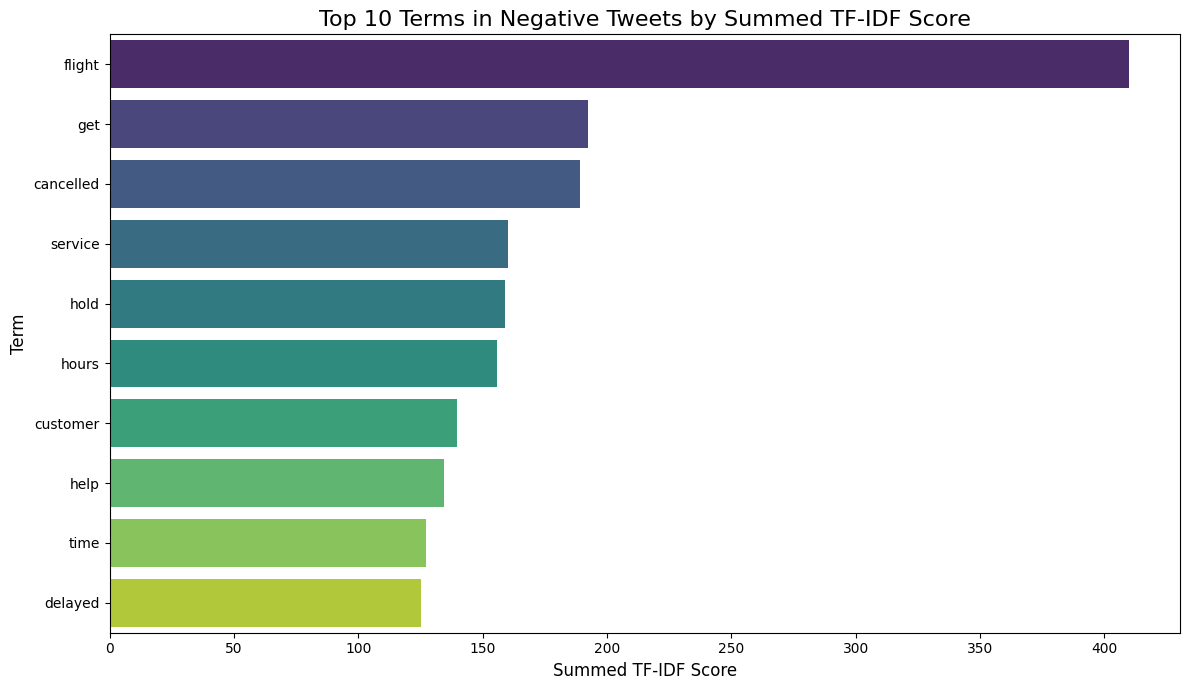

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top N terms (e.g., top 10)
top_n = 10
plot_data = top_negative_terms.head(top_n)

# Create the bar chart
plt.figure(figsize=(12, 7))
# Addressing the FutureWarning by explicitly setting hue and legend
sns.barplot(x=plot_data.values, y=plot_data.index, hue=plot_data.index, palette='viridis', legend=False)

plt.title(f'Top {top_n} Terms in Negative Tweets by Summed TF-IDF Score', fontsize=16)
plt.xlabel('Summed TF-IDF Score', fontsize=12)
plt.ylabel('Term', fontsize=12)
plt.tight_layout()
plt.show()

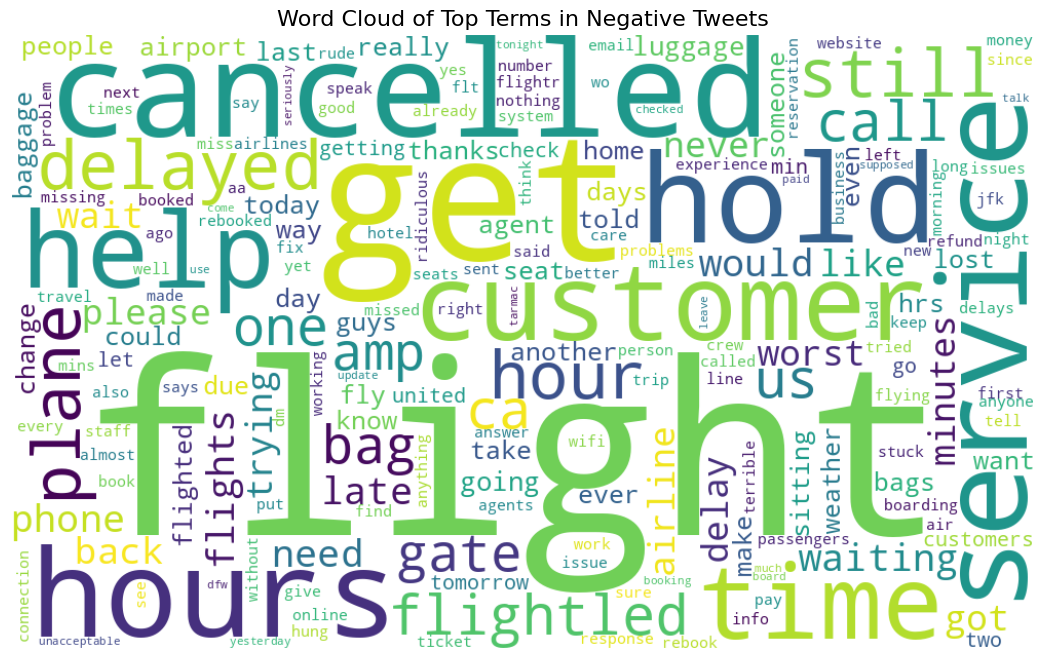

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure top_negative_terms is available and has values
if 'top_negative_terms' in locals() and not top_negative_terms.empty:
    # Create a dictionary from the Series for WordCloud generation
    wordcloud_data = top_negative_terms.to_dict()

    # Generate the word cloud
    wordcloud = WordCloud(width=1000, height=600, background_color='white', colormap='viridis').generate_from_frequencies(wordcloud_data)

    # Display the word cloud
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Top Terms in Negative Tweets', fontsize=16)
    plt.show()
else:
    print("Error: 'top_negative_terms' not found or is empty. Please ensure the previous steps for identifying top terms have been run.")

In [19]:
# Cleaned tweet corpus (available in tweets_df as 'cleaned_text', 'tokenized_text', and 'processed_text')
print("--- Cleaned Tweet Corpus Samples ---")
print("Original Text vs Cleaned Text:")
print(tweets_df[['text', 'cleaned_text']].head())
print("\nCleaned Text vs Tokenized Text:")
print(tweets_df[['cleaned_text', 'tokenized_text']].head())
print("\nTokenized Text joined for TF-IDF (processed_text):")
print(tweets_df[['tokenized_text', 'processed_text']].head())

# TF-IDF matrix
print("\n--- TF-IDF Matrix Information ---")
print("Shape of the TF-IDF matrix:", tfidf_matrix.shape)
print("First 10 feature names (vocabulary):")
print(tfidf_vectorizer.get_feature_names_out()[:10])

# Visualization focusing on negative sentiment vocabulary
print("\n--- Top TF-IDF Terms for Negative Sentiment ---")
print("Top 10 terms in negative tweets by summed TF-IDF score:")
print(top_negative_terms.head(10))

# The bar chart and word cloud visualizations have already been displayed above.

--- Cleaned Tweet Corpus Samples ---
Original Text vs Cleaned Text:
                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                        cleaned_text  
0                                        What  said.  
1  plus you've added commercials to the experienc...  
2  I didn't today... Must mean I need to take ano...  
3  it's really aggressive to blast obnoxious "ent...  
4           and it's a really big bad thing about it  

Cleaned Text vs Tokenized Text:
                                        cleaned_text  \
0                                        What  said.   
1  plus you've added commercials to the experienc...   
2  I didn't today... Must mean I need to take ano...   
3  it's 